In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Any results you write to the current directory are saved as output.

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Read dataset
In this kernel, I will focus on those datasets which help to explain various features of Seaborn. So, I will read the related datasets with pandas read_csv() function.




In [5]:
fifa19 = pd.read_csv("C:/Users/Vemul/Downloads/2,3,4-12-24- EDA/6-12-24/6th- Seaborn, Eda practicle/6th- Seaborn, Eda practicle/Seaborn/FIFA.csv", index_col=0)


In [6]:
fifa19.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### View summary of dataset

In [8]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [9]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

#### Comment
. This dataset contains 89 variables.

. Out of the 89 variables, 44 are numerical variables. 38 are of float64 data type and remaining    6 are of int64 data type.

. The remaining 45 variables are of character data type.

.  Let's explore this further.

### Explore Age variable

#### Visualize distribution of Age variable with Seaborn distplot() function

. Seaborn distplot() function flexibly plots a univariate distribution of observations.
. This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.
.  So, let's visualize the distribution of Age variable with Seaborn distplot() function.

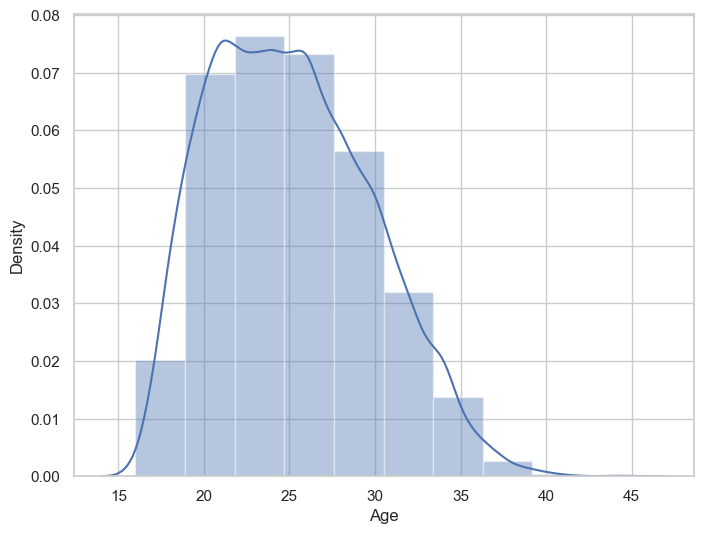

In [14]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10)
plt.show()

### Comment
. It can be seen that the Age variable is slightly positively skewed.

#### We can use Pandas series object to get an informative axis label as follows-

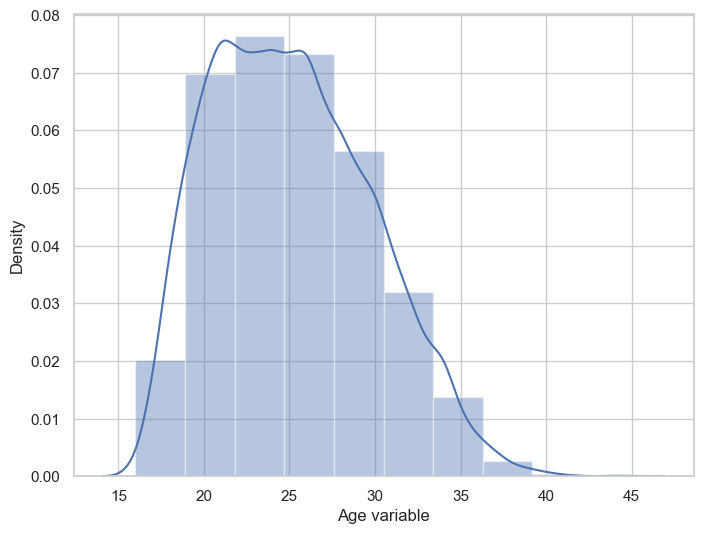

In [17]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

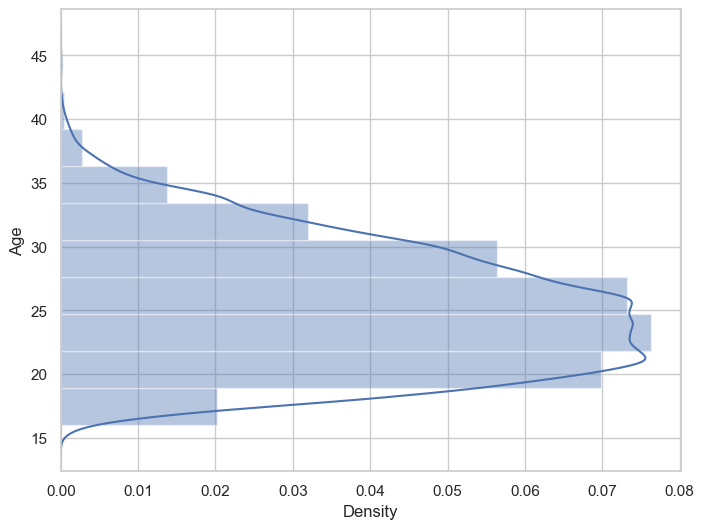

In [18]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

## Seaborn Kernel Density Estimation (KDE) Plot

. The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- Seaborn kdeplot is another seaborn plotting function that fits and plot a univariate       or bivariate kernel density estimate.

- Like the histogram, the KDE plots encode the density of observations on one axis with     height along the other axis.

- We can plot a KDE plot as follows-

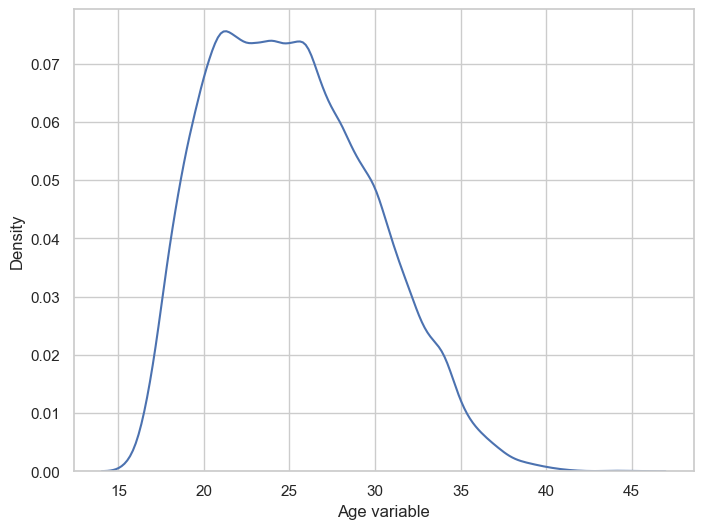

In [24]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

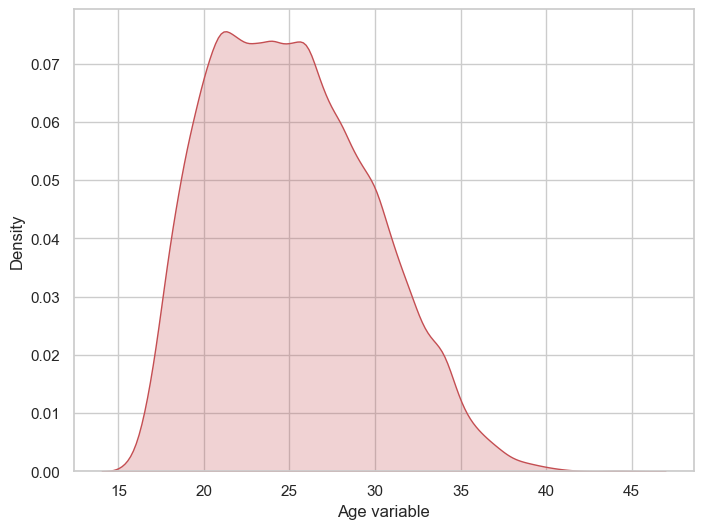

In [25]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

## Histograms

- A histogram represents the distribution of data by forming bins along the range of the    data and then drawing bars to show the number of observations that fall in each bin. 

- A `hist()` function already exists in matplotlib

- We can use Seaborn to plot a histogram.

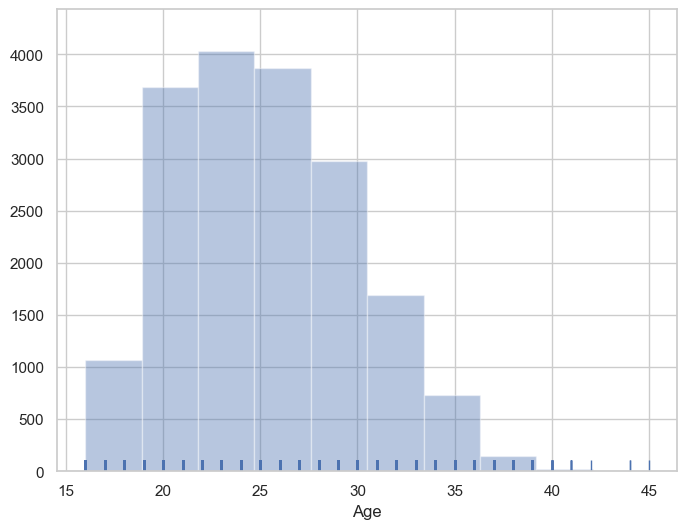

In [30]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

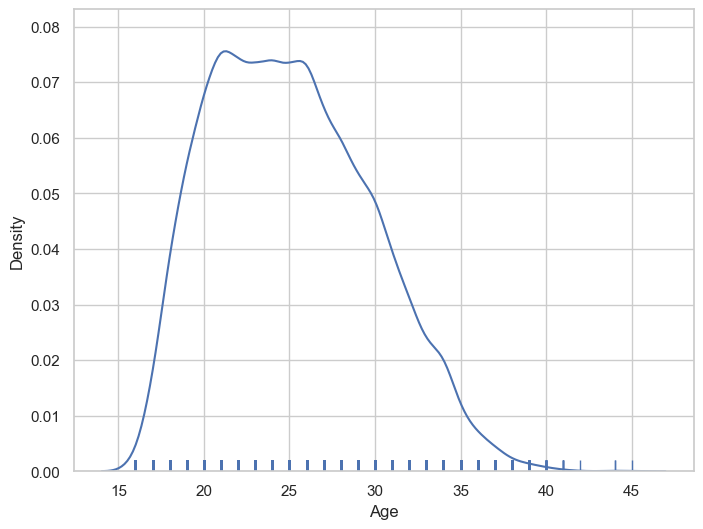

In [31]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

### Explore `Preferred Foot` variable

### Check number of unique values in Preferred Foot variable

In [34]:
fifa19['Preferred Foot'].nunique()

2

### check frequency distribution of values in Preferred Foot variable

In [36]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

## Visualize distribution of values with Seaborn countplot() function.

- A countplot shows the counts of observations in each categorical bin using bars.

- It can be thought of as a histogram across a categorical, instead of quantitative,     variable.

- This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

1. - We can visualize the distribution of values with Seaborn `countplot()` function as follows-

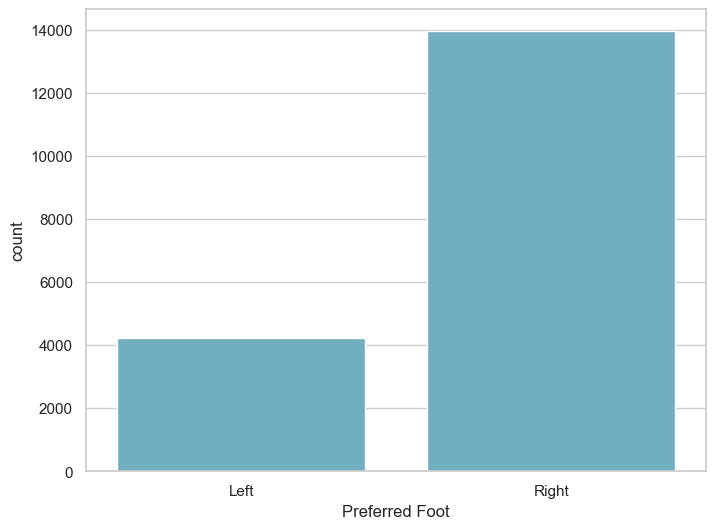

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=fifa19, color="c")
plt.show()

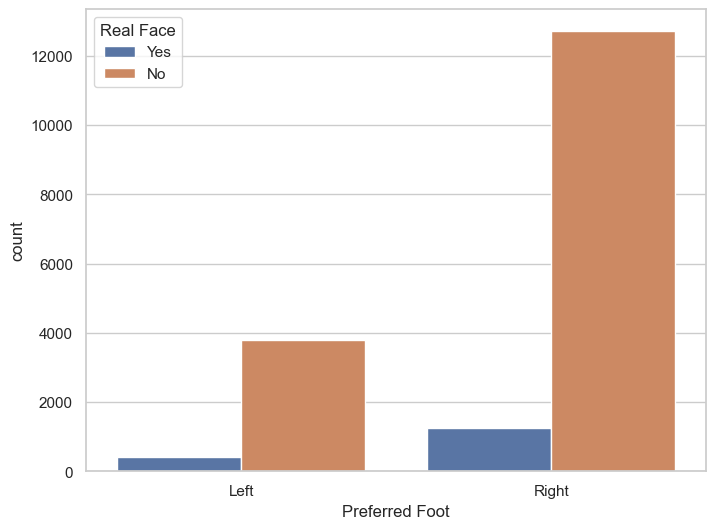

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

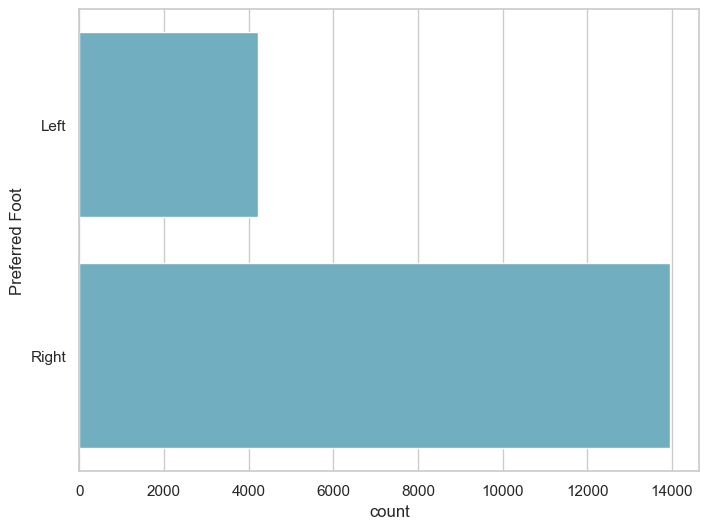

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot", data=fifa19, color="c")
plt.show()

## Seaborn Catplot() function

- We can use Seaborn Catplot() function to plot categorical scatterplots.

- The default representation of the data in `catplot()` uses a scatterplot. 

- It helps to draw figure-level interface for drawing categorical plots onto a facetGrid.

- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 

- The `kind` parameter selects the underlying axes-level function to use.

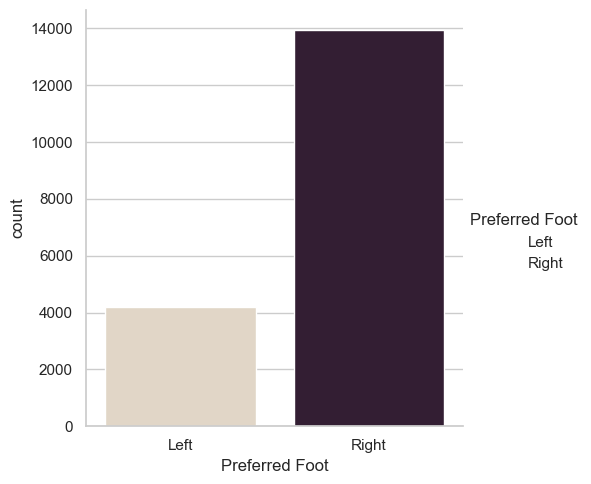

In [51]:
g = sns.catplot(x="Preferred Foot", kind="count", palette="ch:.25", data=fifa19)
plt.show()

## Explore International Reputation variable

## Check the number of unique values in International Reputation variable

In [54]:
fifa19['International Reputation'].nunique()

5

## Check the distribution of values in International Reputation variable

In [56]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

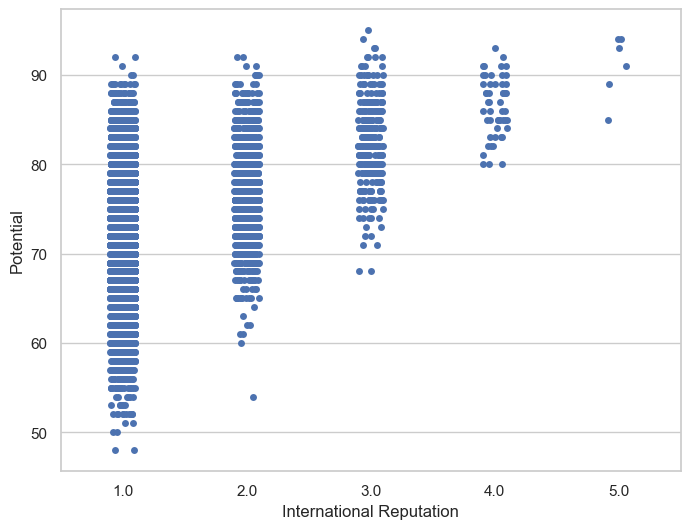

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

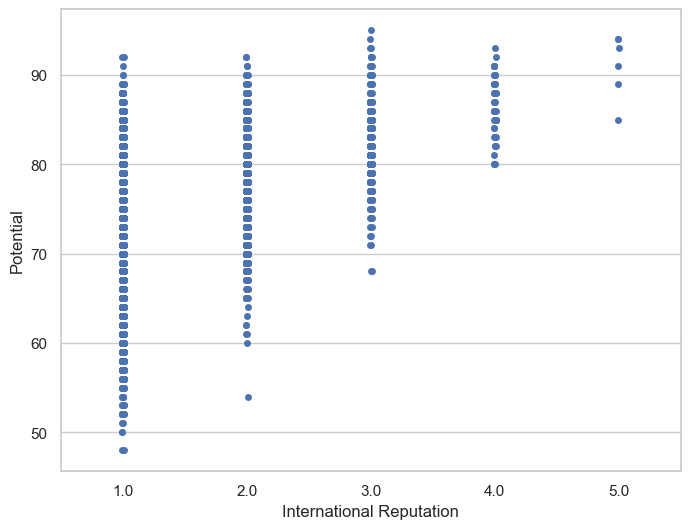

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, jitter=0.01)
plt.show()

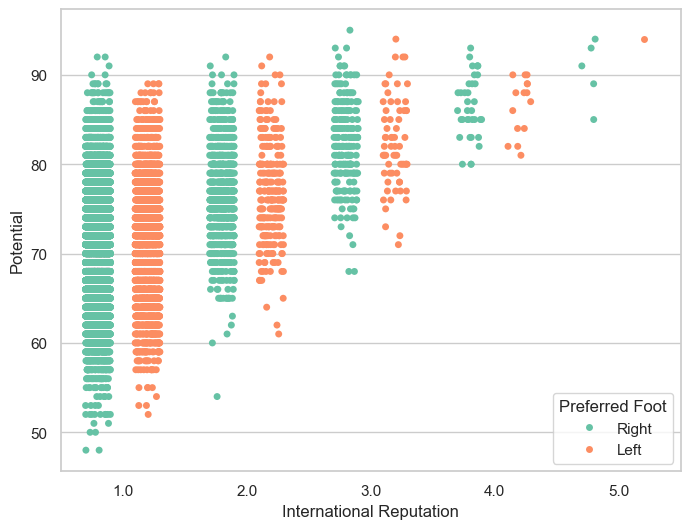

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

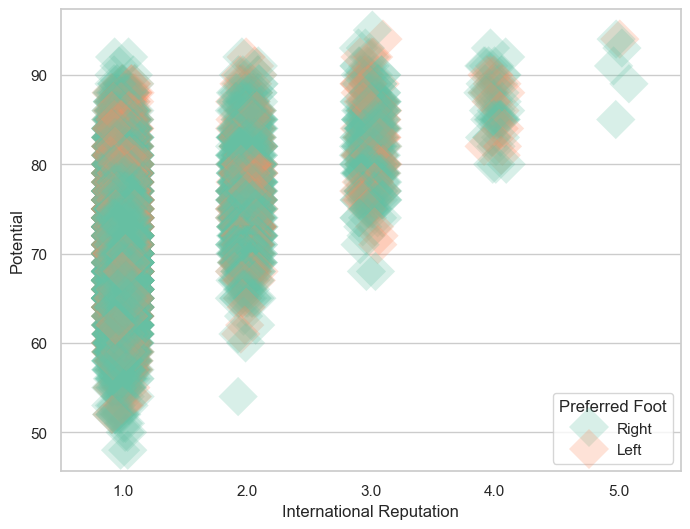

In [60]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

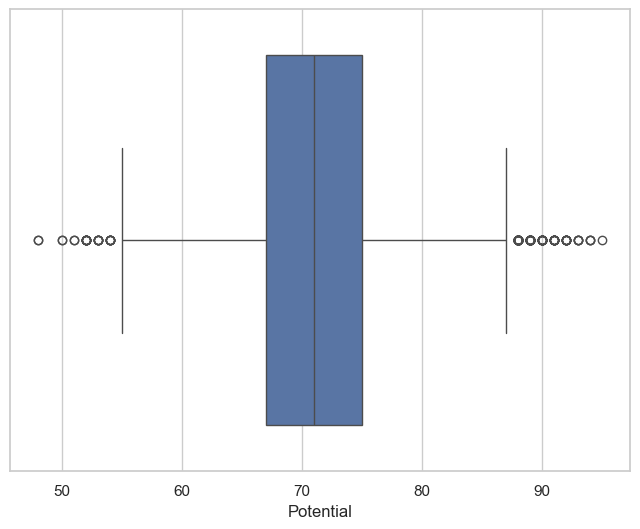

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

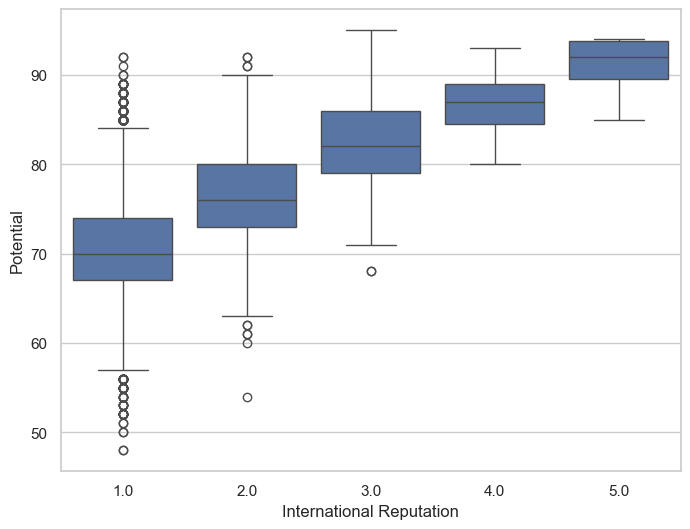

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

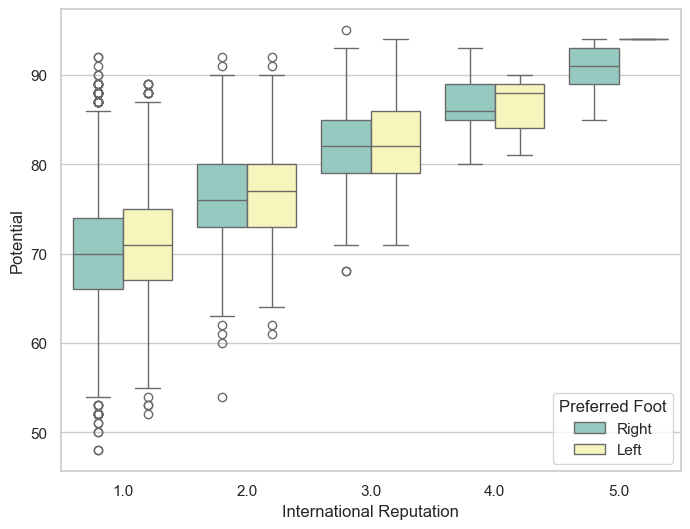

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set3")
plt.show()

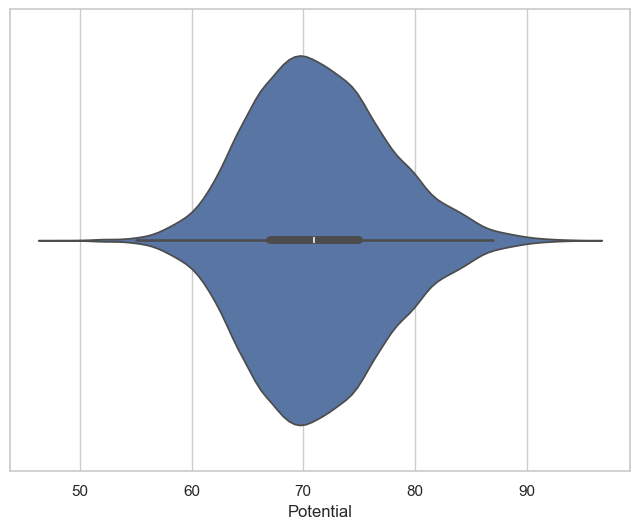

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

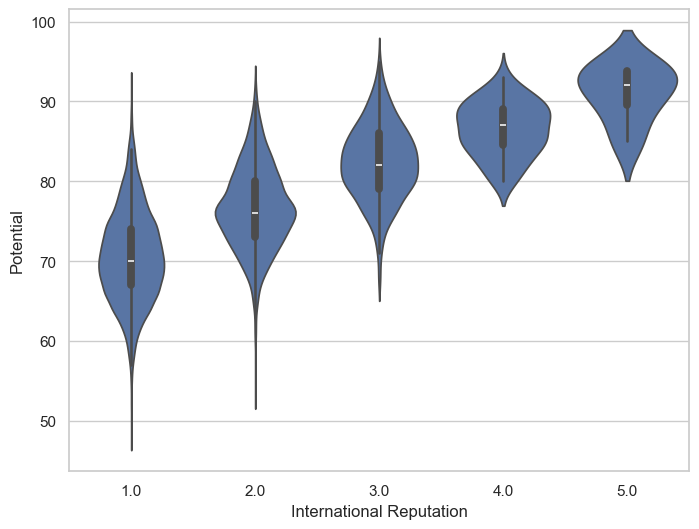

In [65]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

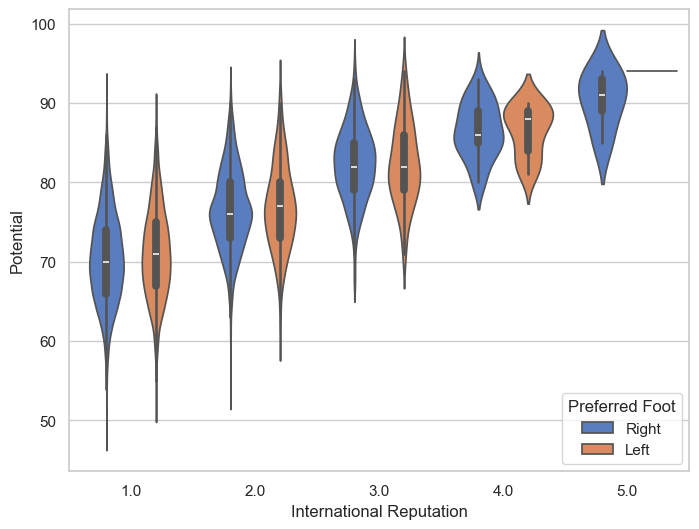

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="muted")
plt.show()

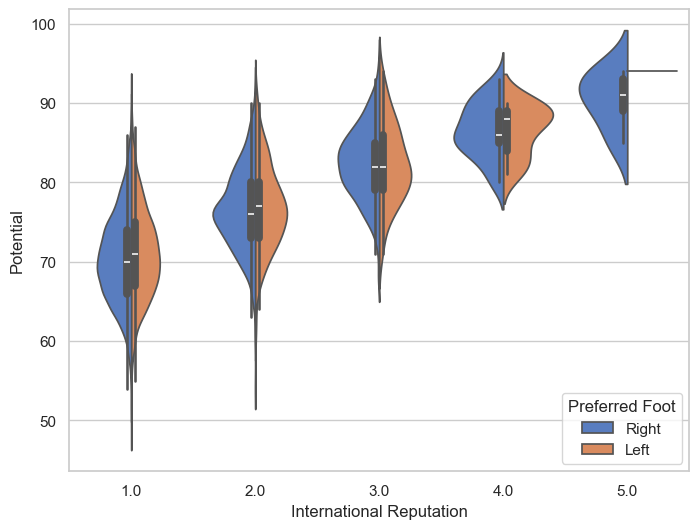

In [67]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa19, palette="muted", split=True)
plt.show()

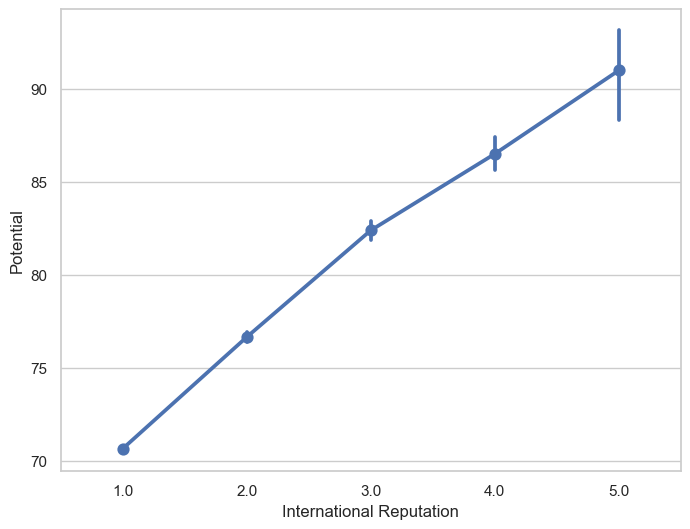

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

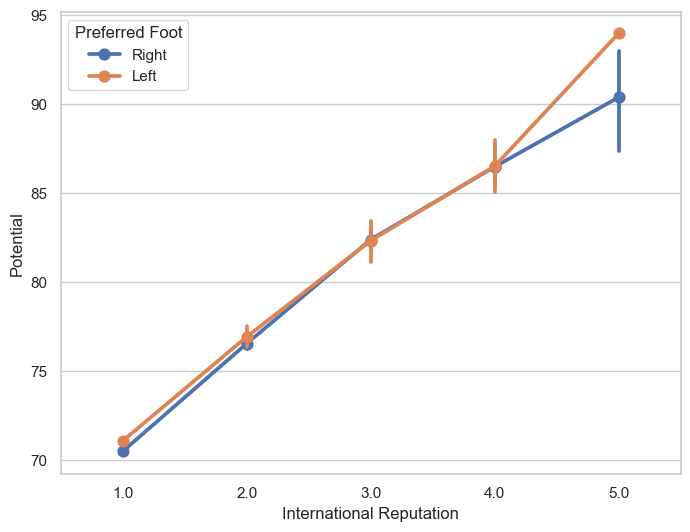

In [69]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

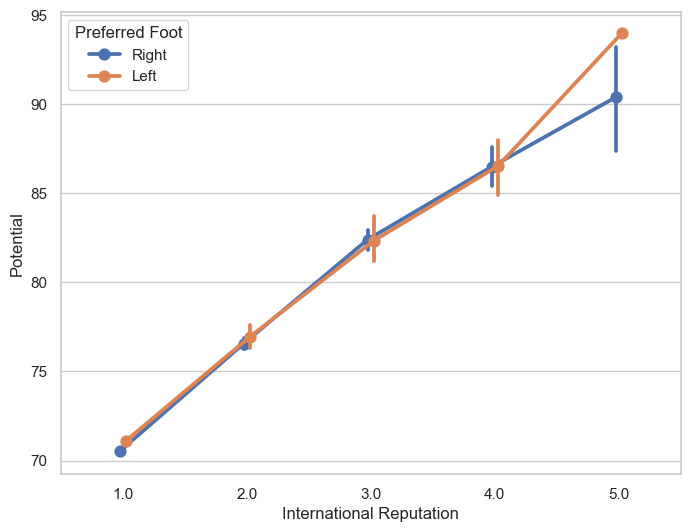

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, dodge=True)
plt.show()

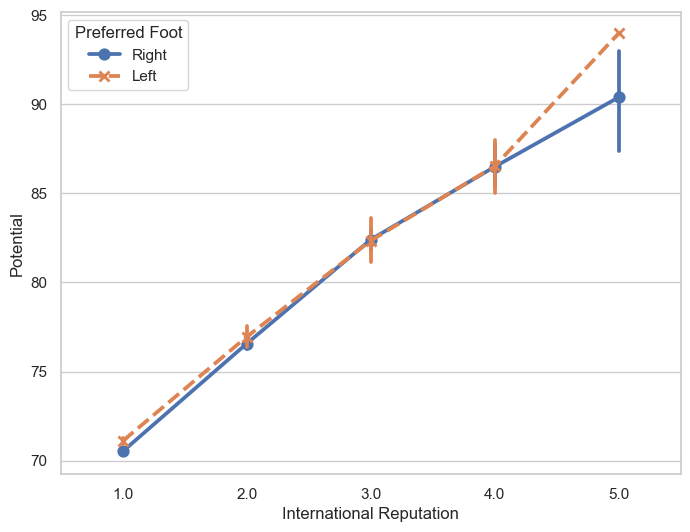

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

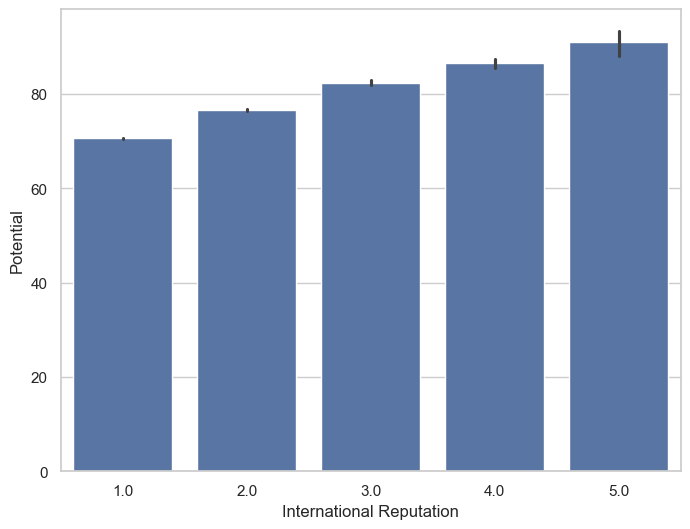

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

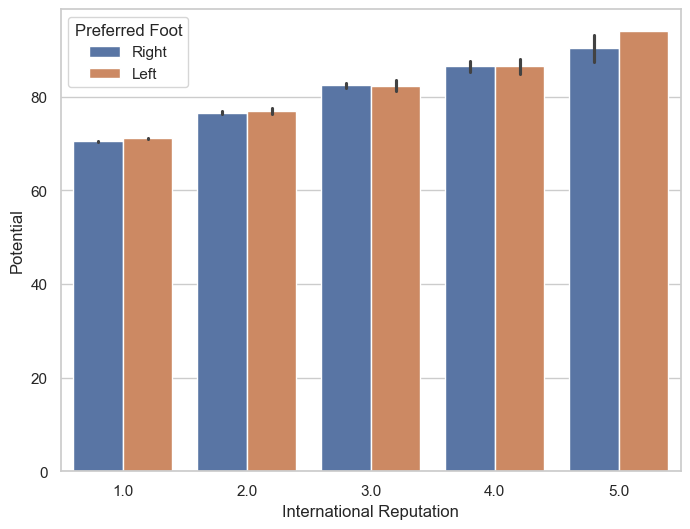

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

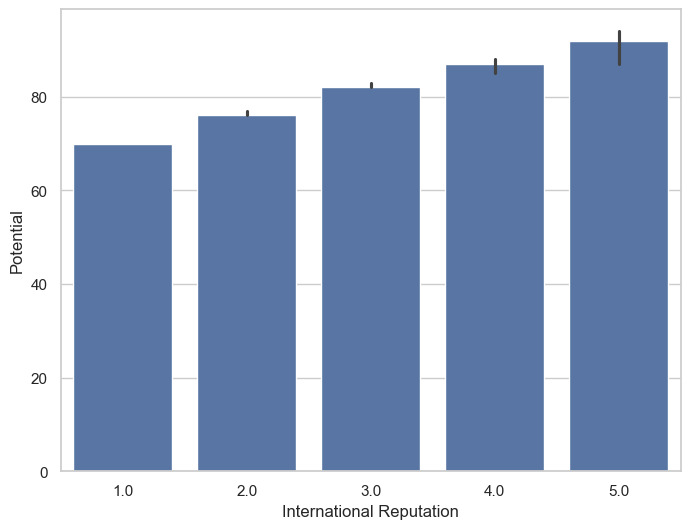

In [74]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median)
plt.show()

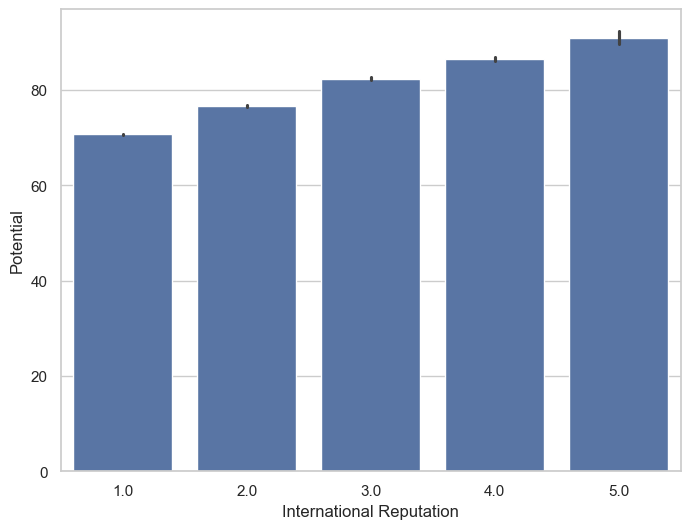

In [75]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=68)
plt.show()

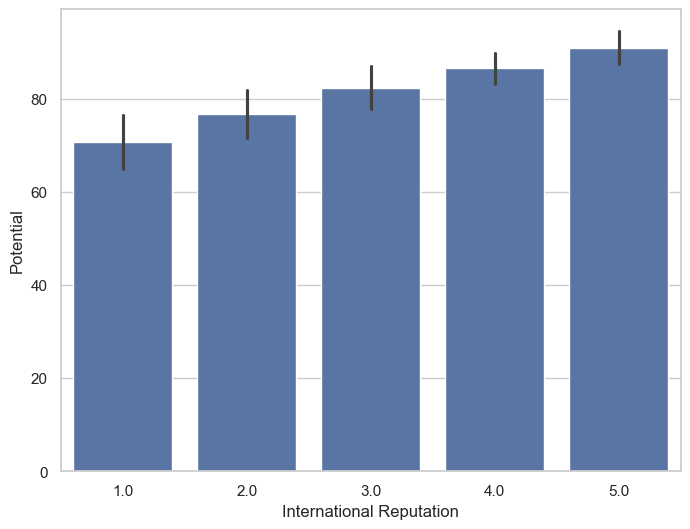

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd")
plt.show()

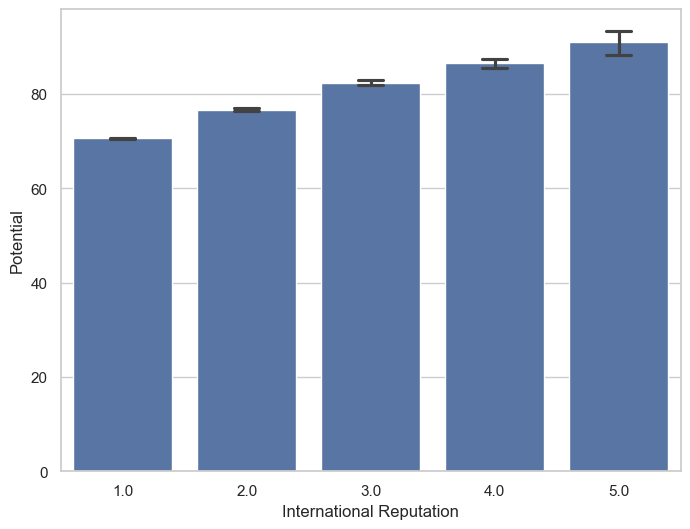

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2)
plt.show()

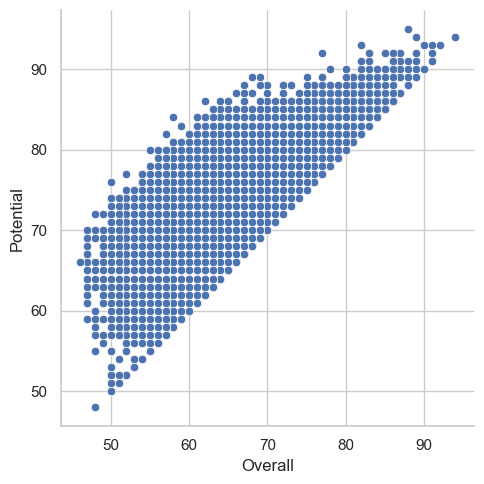

In [78]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)
plt.show()

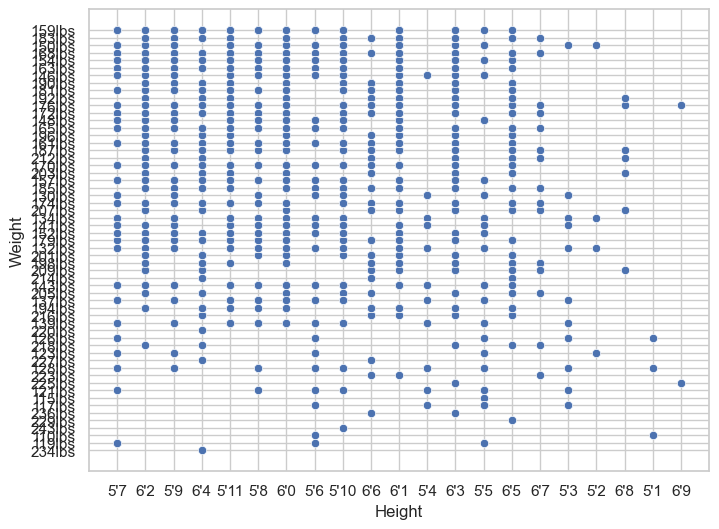

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

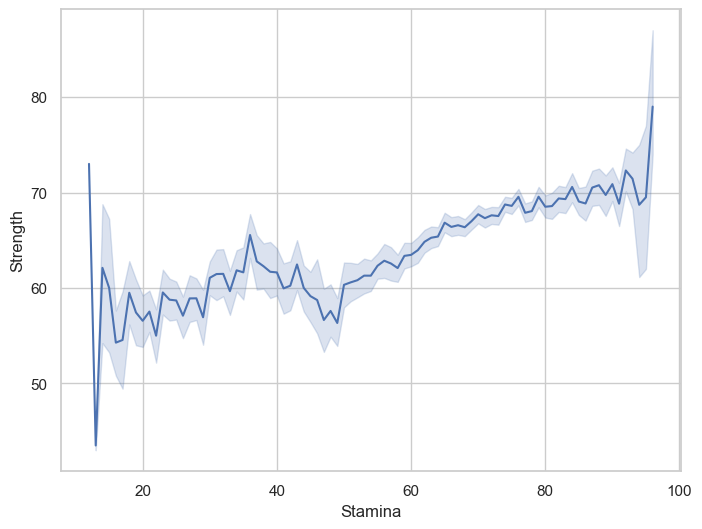

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

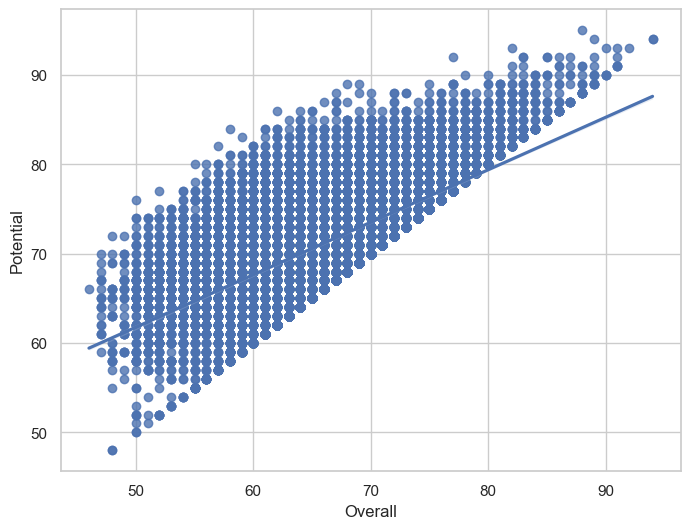

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19)
plt.show()

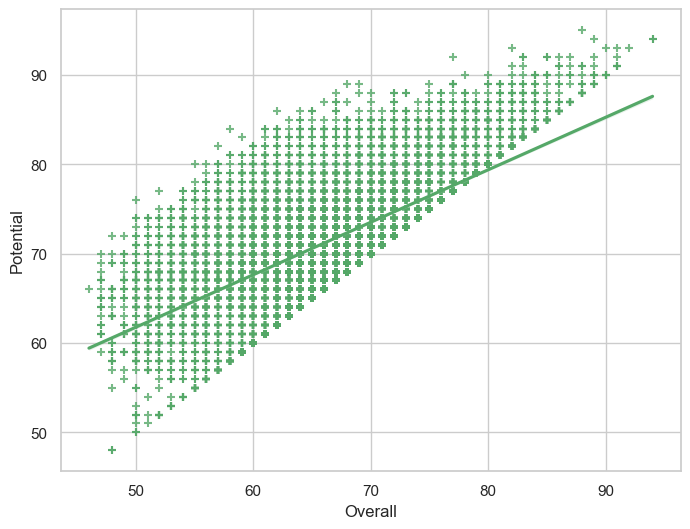

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color= "g", marker="+")
plt.show()

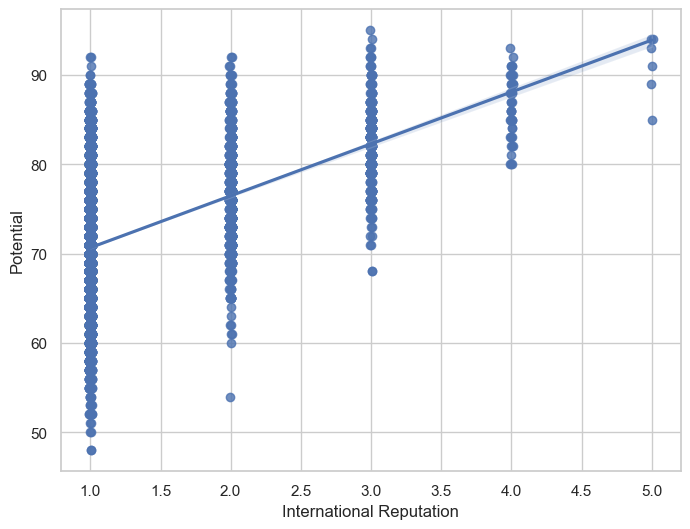

In [83]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

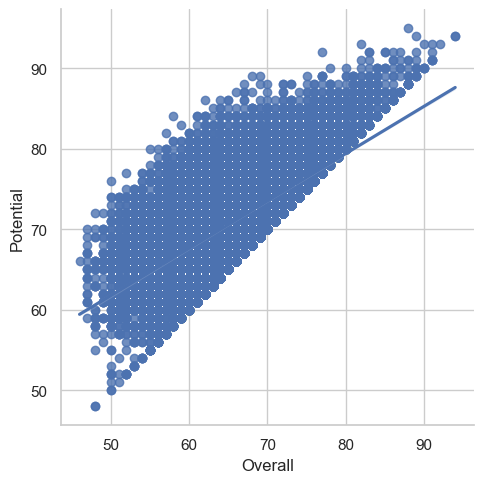

In [84]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)
plt.show()

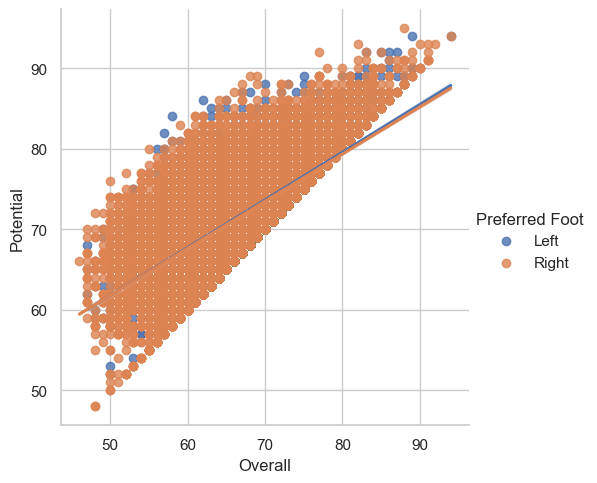

In [85]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

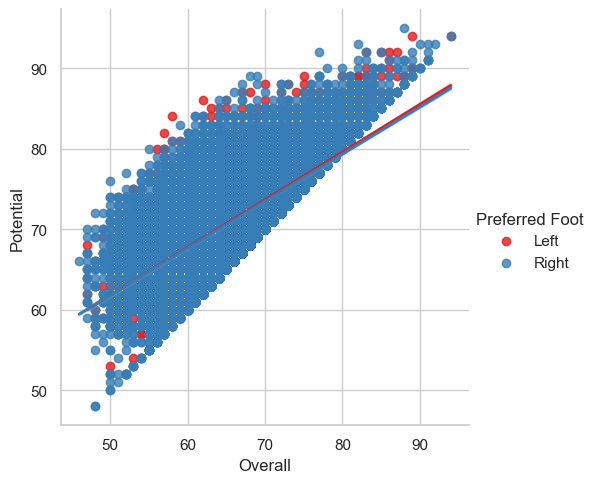

In [86]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")
plt.show()

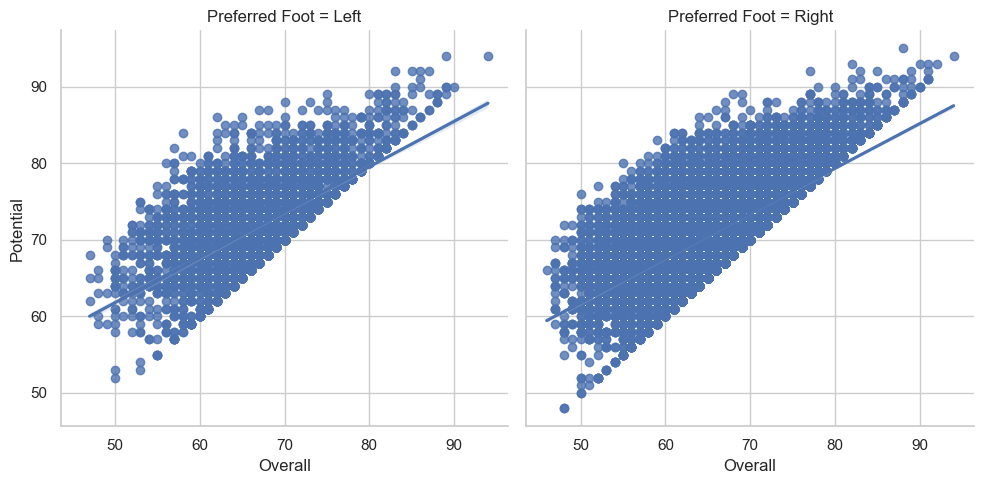

In [87]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)
plt.show()

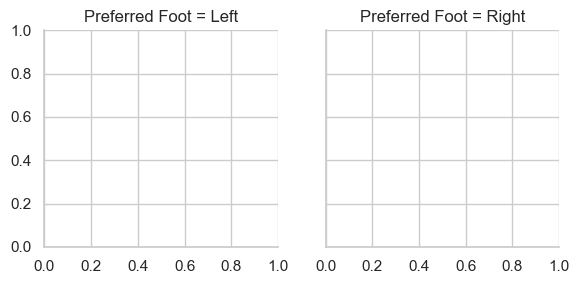

In [88]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
plt.show()

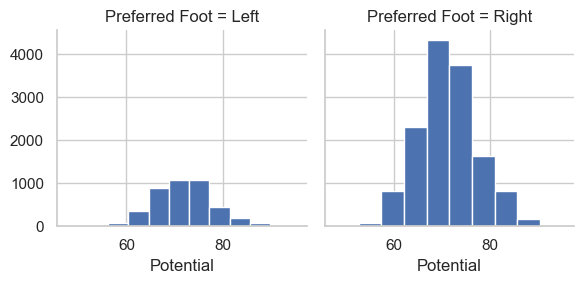

In [89]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")
plt.show()

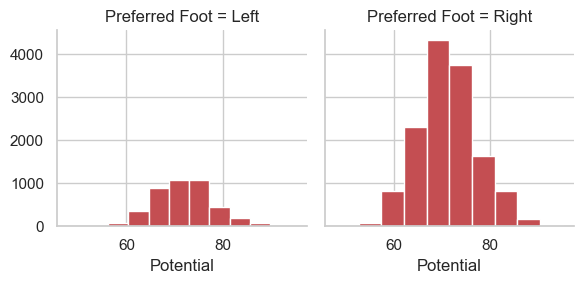

In [90]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")
plt.show()

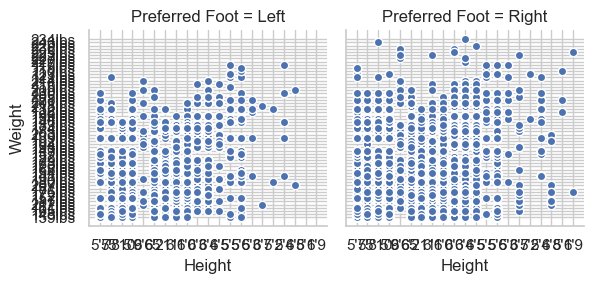

In [91]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())
plt.show()

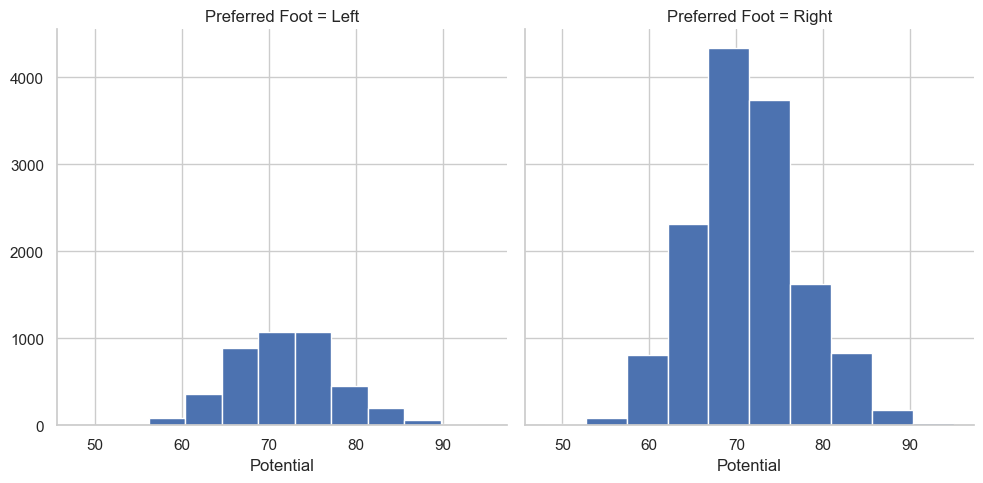

In [92]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")
plt.show()

In [93]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]
plt.show()

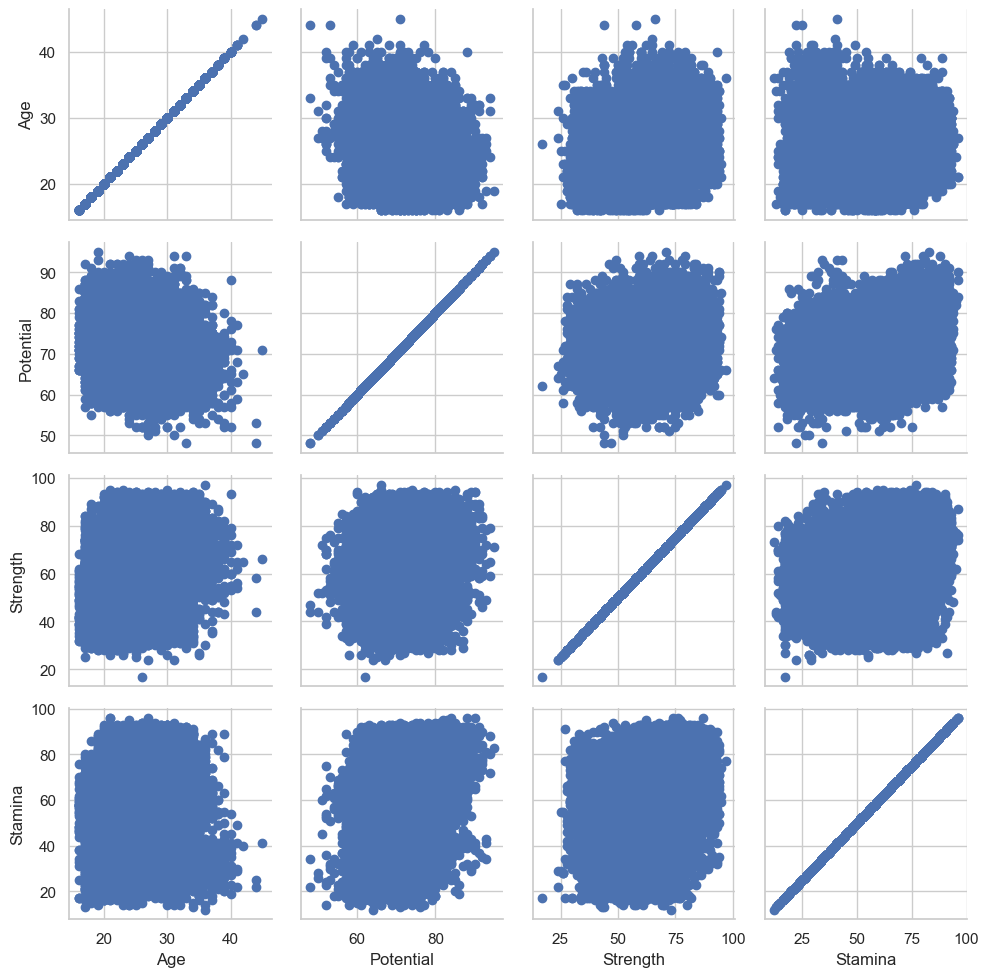

In [94]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)
plt.show()

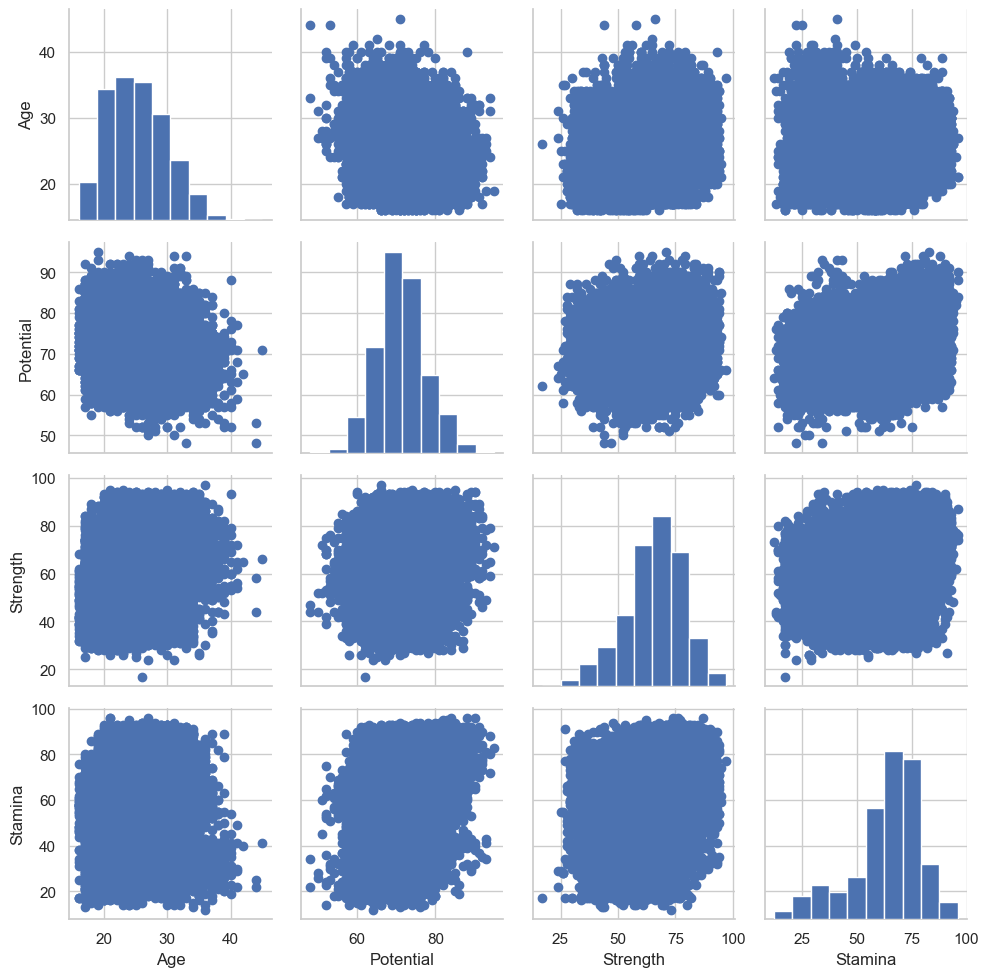

In [95]:
g = sns.PairGrid(fifa19_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

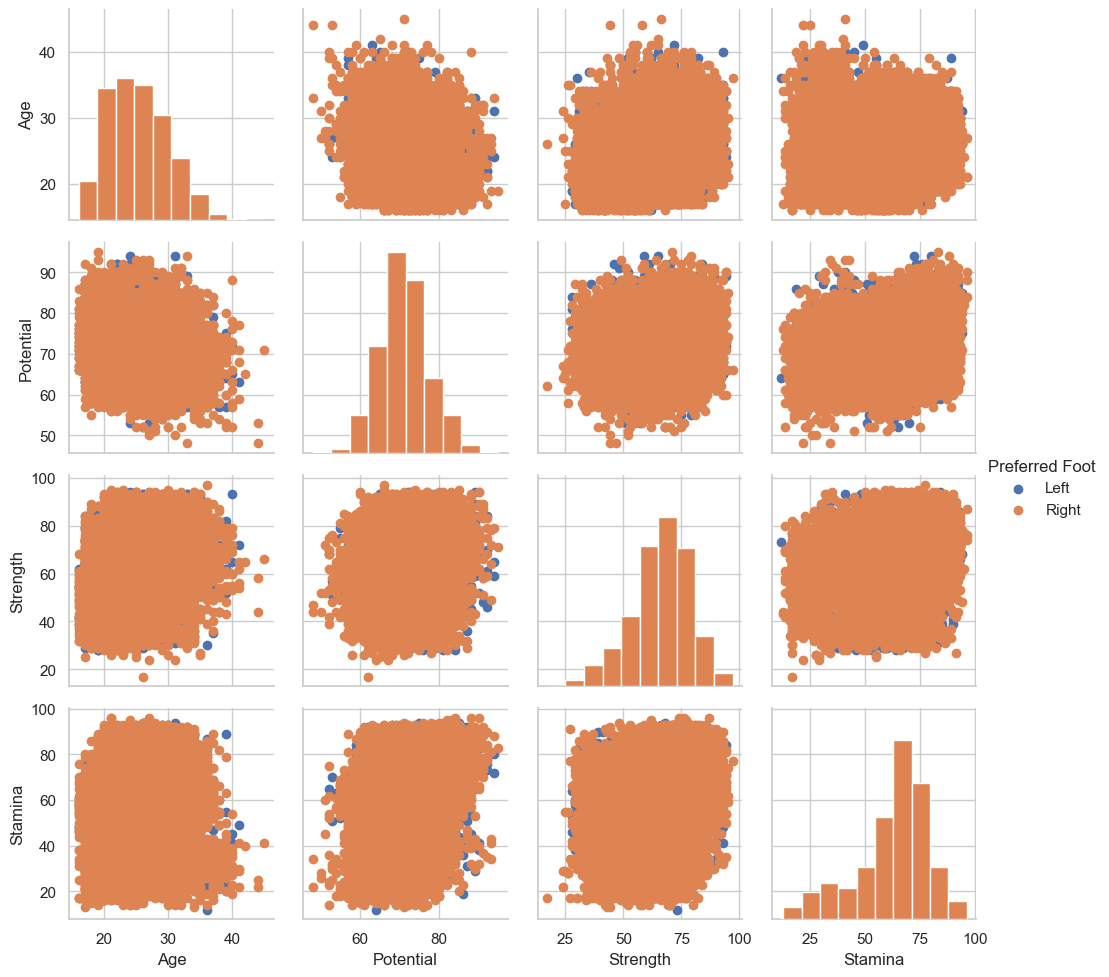

In [96]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

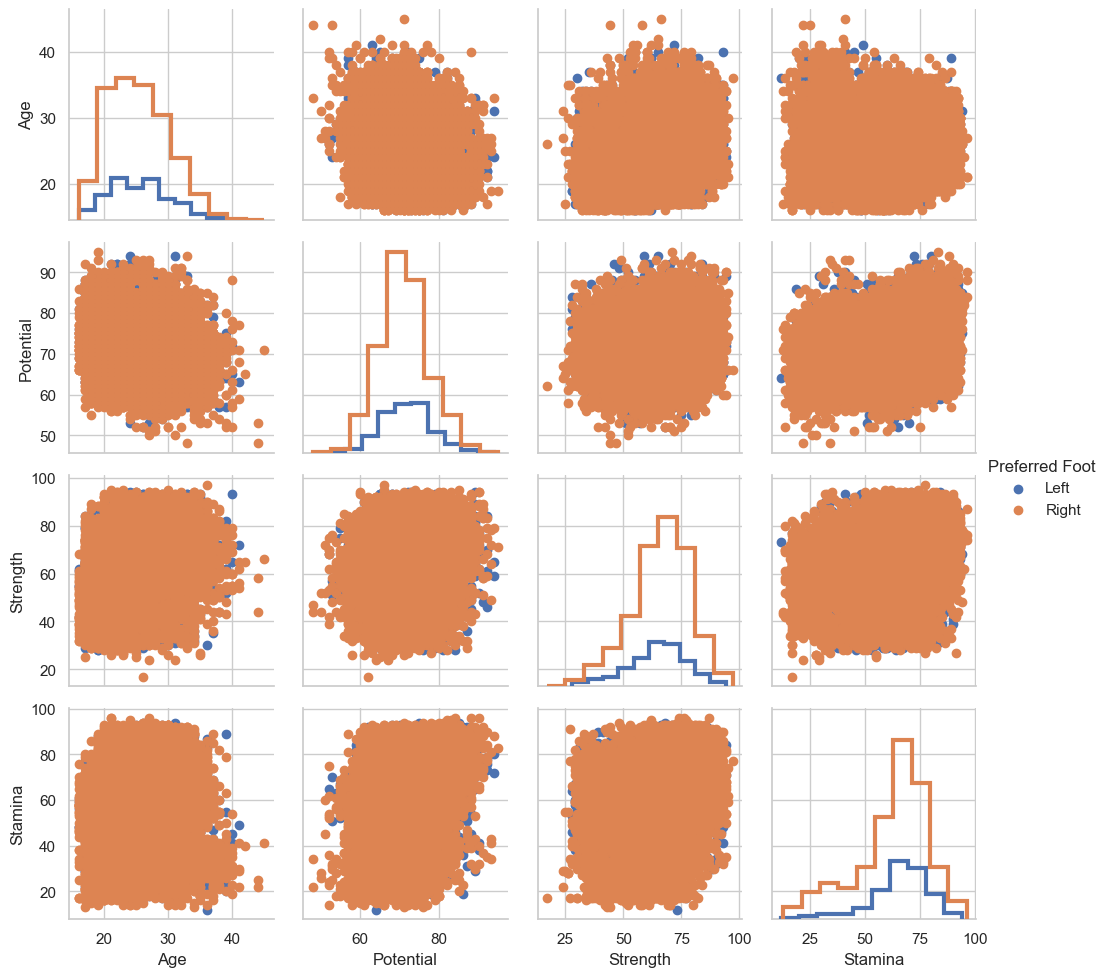

In [97]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

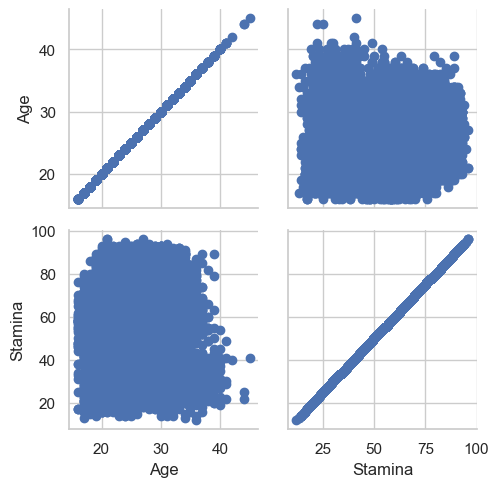

In [98]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)
plt.show()

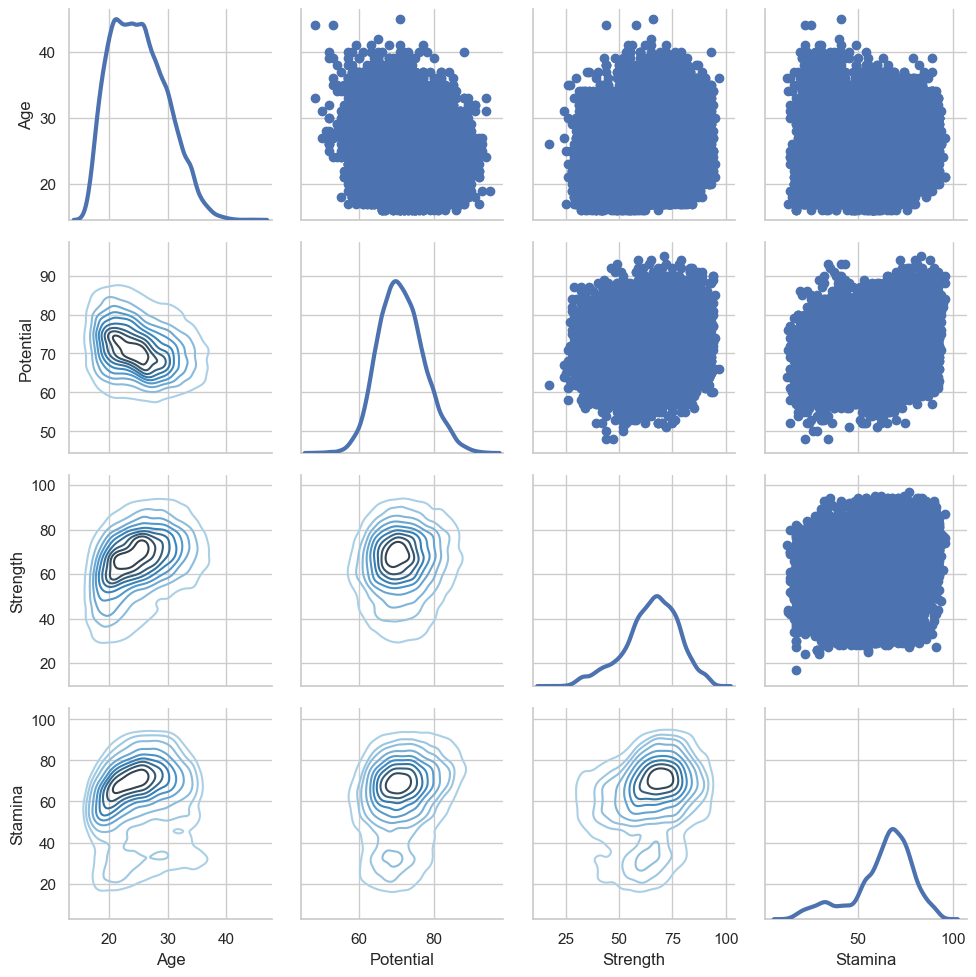

In [99]:
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

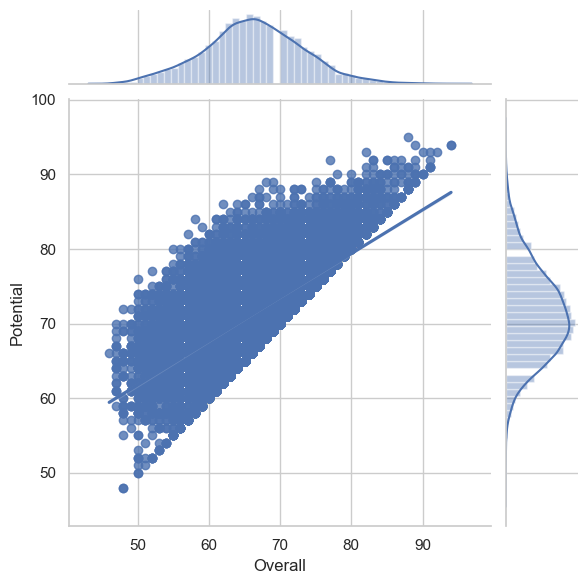

In [100]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

In [101]:
import matplotlib.pyplot as plt

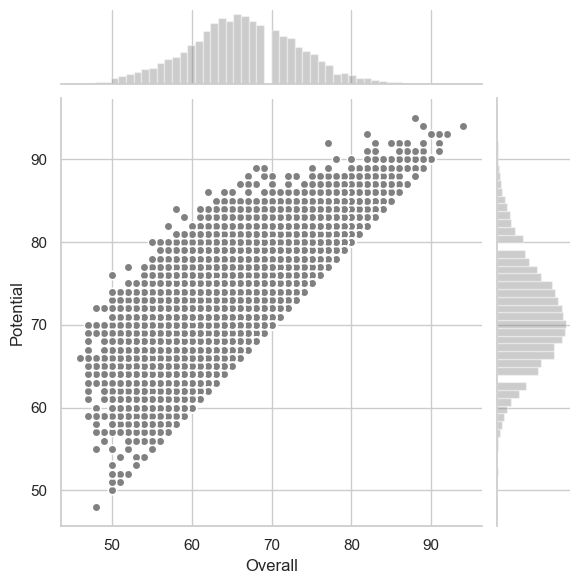

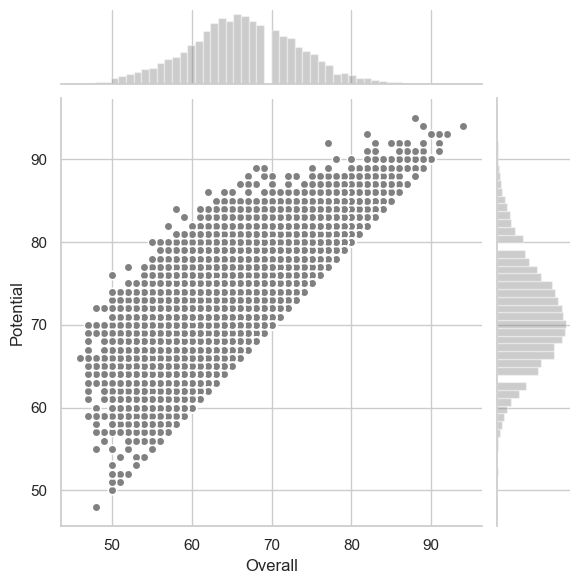

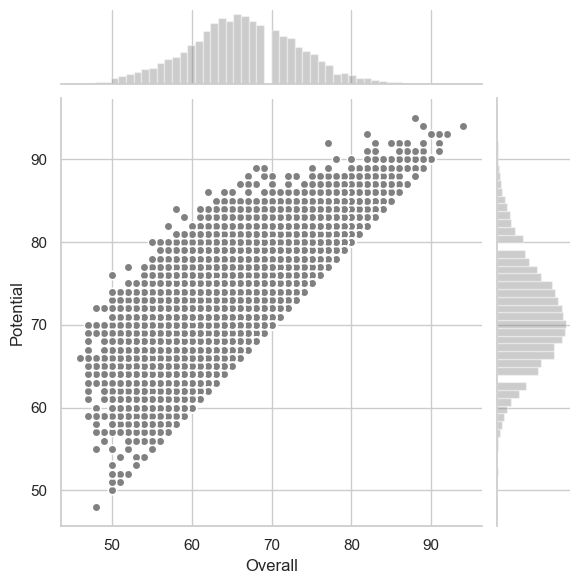

In [105]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

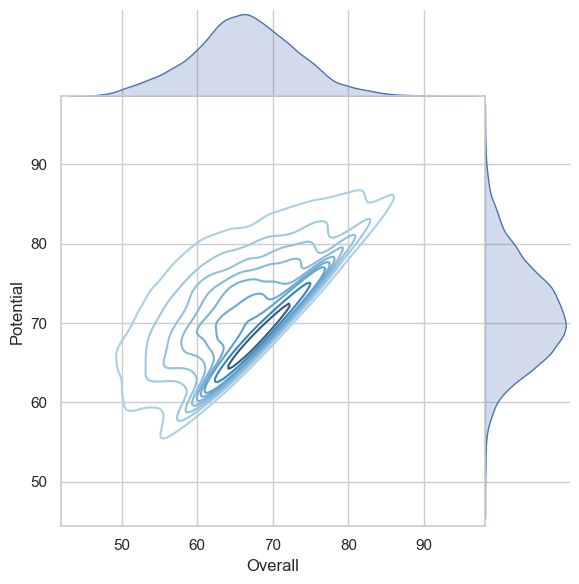

In [107]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

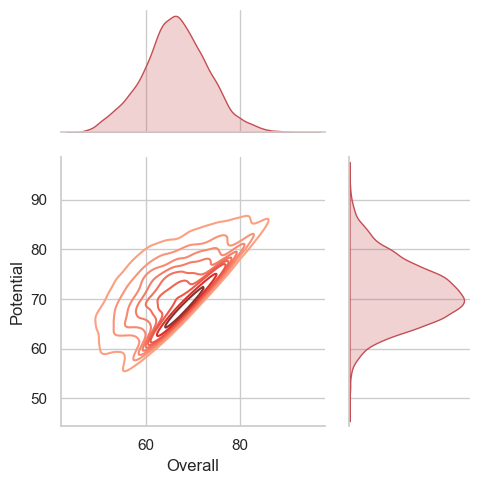

In [108]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()

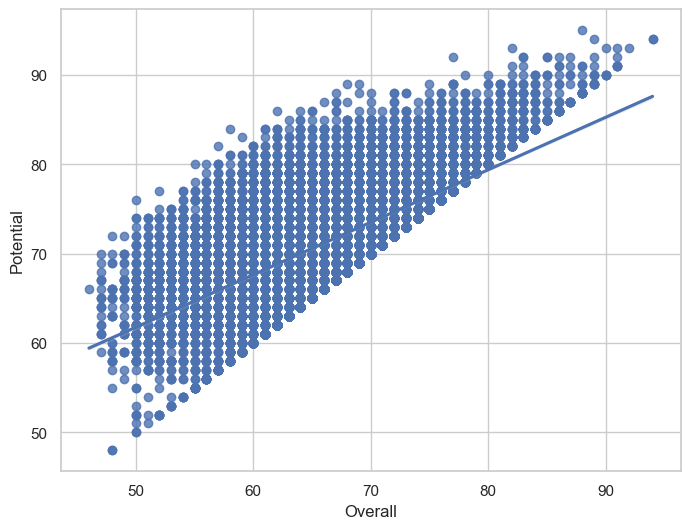

In [109]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);
plt.show()

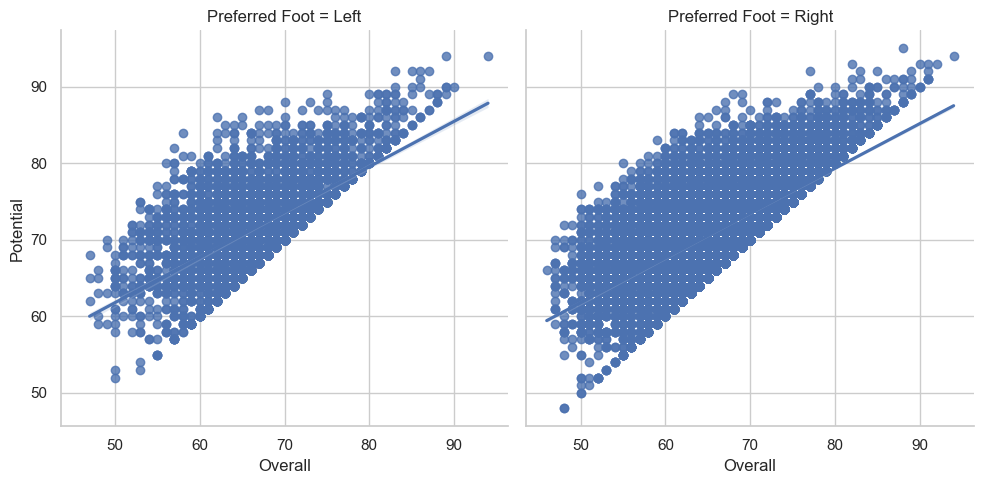

In [110]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19, col_wrap=2, height=5, aspect=1)
plt.show()

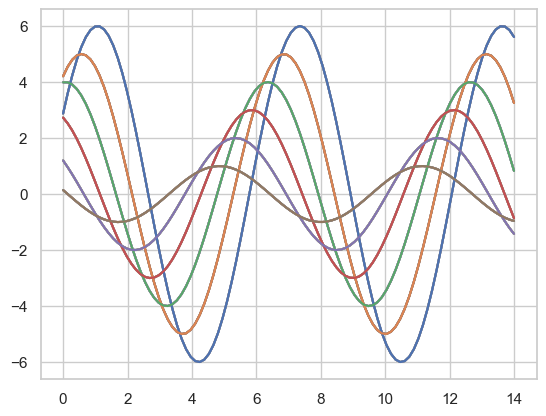

In [133]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
plt.show()

In [1]:
sinplot()

NameError: name 'sinplot' is not defined

In [11]:
sns.set()
sinplot()

NameError: name 'sns' is not defined

In [13]:
sns.set_style("whitegrid")
sinplot()

NameError: name 'sns' is not defined

In [ ]:
sns.set_style("dark")
sinplot()

In [ ]:
sns.set_style("white")
sinplot()

In [ ]:
sns.set_style("ticks")
sinplot()